In [1]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Statistics")
Pkg.add("StatsModels")
Pkg.add("GLM")

   Resolving package versions...
  No Changes to `C:\Users\ANGIE\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ANGIE\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
    PlotUtils Being precompiled by another process (pid: 1384, pidfile: C:\Users\ANGIE\.julia\compiled\v1.10\PlotUtils\YveHG_t0WcE.ji.pidfile)
  ✓ xkbcommon_jll
  ✓ libass_jll
  ✓ Vulkan_Loader_jll
    Qt6Base_jll Being precompiled by another process (pid: 9864, pidfile: C:\Users\ANGIE\.julia\compiled\v1.10\Qt6Base_jll\Lg7vK_t0WcE.ji.pidfile)
  ✓ FFMPEG_jll
  ✓ Qt6Base_jll
    GR_jll Being precompiled by another process (pid: 1384, pidfile: C:\Users\ANGIE\.julia\compiled\v1.10\GR_jll\jV9xf_t0WcE.ji.pidfile)
  ✓ FFMPEG
  ✓ GR_jll
    GR Being precompiled by another process (pid: 1384, pidfile: C:\Users\ANGIE\.julia\compiled\v1.10\GR\NDU5Y_t0WcE.ji.pidfile)
  ✓ PlotUtils
    PlotThemes Being precompiled by another process (pid: 1384, pidfile: C:\Users\ANGIE\.julia\compiled\v1.10\PlotThemes

In [2]:
using DataFrames
using CSV
using Statistics
using StatsModels
using GLM


In [3]:
data = CSV.read("C:/Users/ANGIE/Desktop/abcf/processed_esti.csv", DataFrame)


Row,y,w,gender_female,gender_male,gender_transgender,ethnicgrp_asian,ethnicgrp_black,ethnicgrp_mixed_multiple,ethnicgrp_other,ethnicgrp_white,partners1,postlaunch,msm,age,imd_decile
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,1,0,1,0,0,0,1,0,0,0,1,0,27,5
2,0,0,0,1,0,0,0,0,0,1,0,0,0,19,6
3,0,1,0,1,0,0,1,0,0,0,0,1,0,26,4
4,0,0,1,0,0,0,0,0,0,1,1,0,0,20,2
5,1,1,1,0,0,1,0,0,0,0,0,1,0,24,3
6,1,1,0,1,0,0,0,0,0,1,0,1,0,24,2
7,1,1,1,0,0,0,0,0,0,1,0,0,0,24,4
8,0,0,0,1,0,0,1,0,0,0,0,1,0,21,2
9,0,1,0,1,0,0,0,0,0,1,1,0,0,27,2


In [4]:
treated = filter(row -> row.w == 1, data)
control = filter(row -> row.w == 0, data)

Row,y,w,gender_female,gender_male,gender_transgender,ethnicgrp_asian,ethnicgrp_black,ethnicgrp_mixed_multiple,ethnicgrp_other,ethnicgrp_white,partners1,postlaunch,msm,age,imd_decile
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,0,0,0,1,0,0,0,0,0,1,0,0,0,19,6
2,0,0,1,0,0,0,0,0,0,1,1,0,0,20,2
3,0,0,0,1,0,0,1,0,0,0,0,1,0,21,2
4,0,0,0,1,0,0,0,0,0,1,0,1,1,28,3
5,1,0,1,0,0,0,0,0,0,1,0,1,0,24,2
6,1,0,0,1,0,0,0,0,0,1,0,0,0,22,2
7,1,0,0,1,0,1,0,0,0,0,0,1,0,19,6
8,0,0,1,0,0,0,0,0,0,1,0,0,0,22,2
9,0,0,1,0,0,0,0,1,0,0,1,1,0,19,3


In [5]:
describe_stats = DataFrame(variable=[], mean_control=[], sd_control=[], mean_treated=[], sd_treated=[], diff=[])

Row,variable,mean_control,sd_control,mean_treated,sd_treated,diff
,Any,Any,Any,Any,Any,Any


In [6]:
variables = [:age, :gender_male, :imd_decile]

3-element Vector{Symbol}:
 :age
 :gender_male
 :imd_decile

In [7]:
for var in variables
    mean_control = mean(skipmissing(control[!, var]))
    sd_control = std(skipmissing(control[!, var]))
    mean_treated = mean(skipmissing(treated[!, var]))
    sd_treated = std(skipmissing(treated[!, var]))
    
    # fórmula para la regresión
    response = Term(Symbol(var))
    predictor = Term(:w)
    formula = FormulaTerm(response, predictor)
    
    # modelo lineal
    lm_model = lm(formula, data)
    diff = coef(lm_model)[2]  
    push!(describe_stats, (var, mean_control, sd_control, mean_treated, sd_treated, diff))
end

In [8]:
println(describe_stats)

3×6 DataFrame
 Row │ variable     mean_control  sd_control  mean_treated  sd_treated  diff        
     │ Any          Any           Any         Any           Any         Any         
─────┼──────────────────────────────────────────────────────────────────────────────
   1 │ age          23.0477       3.59401     23.1585       3.53874     0.110846
   2 │ gender_male  0.418093      0.493547    0.409338      0.491979    -0.00875523
   3 │ imd_decile   3.48411       1.48608     3.46037       1.46584     -0.0237384


In [9]:
# Pregunta 2
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("StatsPlots")

   Resolving package versions...
  No Changes to `C:\Users\ANGIE\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ANGIE\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ANGIE\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ANGIE\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ANGIE\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ANGIE\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ANGIE\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ANGIE\.julia\environments\v1.10\Manifest.toml`


In [10]:
using DataFrames
using CSV
using Plots
using StatsPlots

In [19]:
data[:, :group_label] = ifelse.(data[:, :w] .== 1, "Treated", "Control")

1739-element Vector{String}:
 "Treated"
 "Control"
 "Treated"
 "Control"
 "Treated"
 "Treated"
 "Treated"
 "Control"
 "Treated"
 "Treated"
 "Control"
 "Control"
 "Treated"
 ⋮
 "Control"
 "Control"
 "Control"
 "Control"
 "Control"
 "Treated"
 "Control"
 "Control"
 "Treated"
 "Treated"
 "Treated"
 "Treated"

In [20]:
data[:, :group_label] = ifelse.(data[:, :w] .== 1, "Treated", "Control")
data[:, :gender_label] = ifelse.(data[:, :gender_male] .== 1, "Male", "Female")


1739-element Vector{String}:
 "Male"
 "Male"
 "Male"
 "Female"
 "Female"
 "Male"
 "Female"
 "Male"
 "Male"
 "Female"
 "Male"
 "Female"
 "Male"
 ⋮
 "Female"
 "Male"
 "Female"
 "Female"
 "Female"
 "Female"
 "Male"
 "Male"
 "Female"
 "Female"
 "Female"
 "Female"

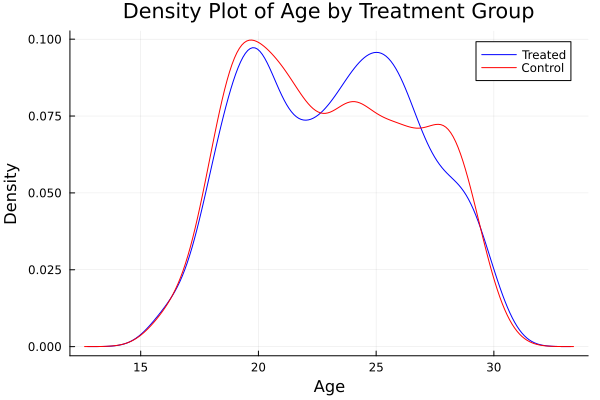

In [23]:
density(data[data.w .== 1, :age], label="Treated", color=:blue, xlabel="Age", ylabel="Density", title="Density Plot of Age by Treatment Group")
density!(data[data.w .== 0, :age], label="Control", color=:red)

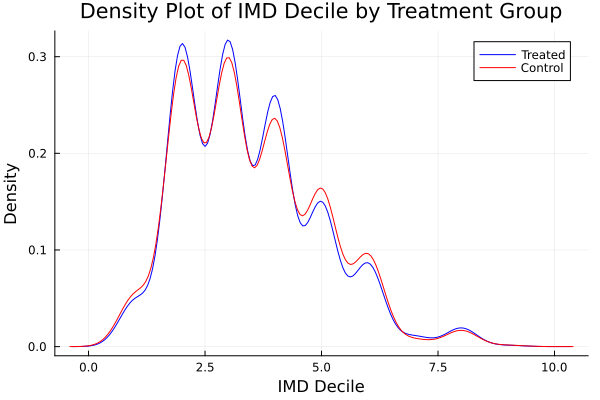

In [24]:
density(data[data.w .== 1, :imd_decile], label="Treated", color=:blue, xlabel="IMD Decile", ylabel="Density", title="Density Plot of IMD Decile by Treatment Group")
density!(data[data.w .== 0, :imd_decile], label="Control", color=:red)

In [29]:
## Análisis de regresión lineal 
#Pregunta 1
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("StatsModels")
Pkg.add("GLM")


   Resolving package versions...
  No Changes to `C:\Users\ANGIE\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ANGIE\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ANGIE\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ANGIE\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ANGIE\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ANGIE\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ANGIE\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ANGIE\.julia\environments\v1.10\Manifest.toml`


In [30]:
using DataFrames
using CSV
using StatsModels
using GLM

In [31]:
formula = @formula(y ~ w)
lm_model = lm(formula, data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + w

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.211491   0.0160531  13.17    <1e-37   0.180006   0.242977
w            0.265164   0.0220586  12.02    <1e-31   0.2219     0.308429
────────────────────────────────────────────────────────────────────────

El tratamiento tiene un efecto positivo y significativo en nuestra variable de interés. En otras palabras, las personas que reciben el tratamiento tienden a tener mejores resultados, un incremento de 0.2652 unidades.

In [43]:
using Pkg

# Instalar paquetes necesarios
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("GLM")
Pkg.add("Lasso")
Pkg.add("Plots")
Pkg.add("GLMNet")
Pkg.update("GLMNet")

   Resolving package versions...
  No Changes to `C:\Users\jeffr\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jeffr\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jeffr\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jeffr\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jeffr\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jeffr\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jeffr\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jeffr\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jeffr\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jeffr\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jeffr\.julia\environments\v1.10\Project.toml`
  No 

In [11]:
using DataFrames
using CSV
using GLM
using GLMNet
using Plots

data = CSV.read("/Users/jeffr/OneDrive/Escritorio/processed_esti.csv", DataFrame)

data

Row,y,w,gender_female,gender_male,gender_transgender,ethnicgrp_asian,ethnicgrp_black,ethnicgrp_mixed_multiple,ethnicgrp_other,ethnicgrp_white,partners1,postlaunch,msm,age,imd_decile
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,1,0,1,0,0,0,1,0,0,0,1,0,27,5
2,0,0,0,1,0,0,0,0,0,1,0,0,0,19,6
3,0,1,0,1,0,0,1,0,0,0,0,1,0,26,4
4,0,0,1,0,0,0,0,0,0,1,1,0,0,20,2
5,1,1,1,0,0,1,0,0,0,0,0,1,0,24,3
6,1,1,0,1,0,0,0,0,0,1,0,1,0,24,2
7,1,1,1,0,0,0,0,0,0,1,0,0,0,24,4
8,0,0,0,1,0,0,1,0,0,0,0,1,0,21,2
9,0,1,0,1,0,0,0,0,0,1,1,0,0,27,2


In [12]:

modelo_ols = lm(@formula(y ~ w + gender_female + gender_male + gender_transgender + ethnicgrp_asian + ethnicgrp_black + ethnicgrp_mixed_multiple + ethnicgrp_other + ethnicgrp_white + partners1 + postlaunch + msm + age + imd_decile), data)

println("Resultados de la regresión lineal múltiple:")
print(GLM.coeftable(modelo_ols))

Resultados de la regresión lineal múltiple:
─────────────────────────────────────────────────────────────────────────────────────────────────
                                Coef.    Std. Error       t  Pr(>|t|)     Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                0.287242      0.247918      1.16    0.2468   -0.199009      0.773494
w                          0.256224      0.021802     11.75    <1e-30    0.213463      0.298985
gender_female             -0.269202      0.227874     -1.18    0.2376   -0.71614       0.177735
gender_male               -0.363822      0.228226     -1.59    0.1111   -0.811451      0.0838076
gender_transgender         0.0         NaN           NaN       NaN     NaN           NaN
ethnicgrp_asian           -0.113221      0.104141     -1.09    0.2771   -0.317477      0.0910339
ethnicgrp_black           -0.130744      0.10178      -1.28    0.1991   -0.33037       0.06

El resultado de la regresión sugiere que el uso del servicio de pruebas eSTI en línea tiene un efecto positivo significativo en el resultado medido: la tasa de detección o tratamiento exitoso de infecciones de transmisión sexual (ITS). Específicamente, el tratamiento aumenta el valor de y en aproximadamente 0.2562 unidades, manteniendo constantes las demás variables. La significancia estadística es clara gracias a los intervalos de confianza, lo que indica que es poco probable que este resultado sea debido al azar.

Sobre los controles:

.-partners1: Negativo y significativo (coeficiente = -0.0576), indicando que tener más de una pareja reduce el valor de y.

.-postlaunch: Positivo y significativo (coeficiente = 0.0748), sugiriendo que el periodo postlanzamiento del servicio de pruebas tiene un efecto positivo en el resultado y.

.-age: Positivo y significativo (coeficiente = 0.0126), indicando que la edad está positivamente asociada con el resultado y.

Los demás controles no son significativos, lo que sugiere que no hay diferencias sustanciales en el resultado y en función a dichas variables.

In [64]:
X = Matrix(select(data, Not(:y)))
y = data.y

cvfit = glmnetcv(X, y, alpha=1.0)

best_lambda_idx = argmin(cvfit.meanloss)
best_lambda = cvfit.lambda[best_lambda_idx]

modelo_lasso_best = glmnet(X, y, alpha=1.0, lambda=[best_lambda])


Least Squares GLMNet Solution Path (1 solutions for 14 predictors in 110 passes):
─────────────────────────────
     df   pct_dev           λ
─────────────────────────────
[1]  11  0.114121  0.00385806
─────────────────────────────

In [60]:
y = data.y
w = data.w
X = select(data, [:gender_female, :gender_male, :gender_transgender,
                :ethnicgrp_asian, :ethnicgrp_black, :ethnicgrp_mixed_multiple,
                :ethnicgrp_other, :ethnicgrp_white, :partners1, :postlaunch,
                :msm, :age, :imd_decile])

X = Matrix(X)

function double_lasso(X, y, w)
    n, p = size(X)
    
    fit1 = fit(LinearModel, X, w)
    resid1 = residuals(fit1)
    
    fit2 = fit(LinearModel, X, resid1)
    
    return fit2
end

fit_double_lasso = double_lasso(X, y, w)

LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}:

Coefficients:
─────────────────────────────────────────────────────────────────────────────
            Coef.    Std. Error       t  Pr(>|t|)     Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────
x1    1.33165e-14    0.251452      0.00    1.0000   -0.493183      0.493183
x2    1.33912e-14    0.251843      0.00    1.0000   -0.493949      0.493949
x3    0.0          NaN           NaN       NaN     NaN           NaN
x4   -1.23384e-14    0.266472     -0.00    1.0000   -0.522641      0.522641
x5   -1.25745e-14    0.264731     -0.00    1.0000   -0.519227      0.519227
x6   -1.23326e-14    0.263795     -0.00    1.0000   -0.517391      0.517391
x7   -1.19284e-14    0.273295     -0.00    1.0000   -0.536023      0.536023
x8   -1.24932e-14    0.262955     -0.00    1.0000   -0.515744      0.515744
x9   -1.

In [65]:
# Gráfico de los coeficientes T en los tres modelos
coefficients_ols = coef(modelo_ols)[2]
coefficients_lasso = coef(modelo_lasso_best)[2]

# Asumiendo que se han guardado los coeficientes de otros modelos
# coeficientes_double_lasso = coef(modelo_double_lasso)

plot([coefficients_ols, coefficients_lasso], seriestype = :bar, labels = ["OLS", "Lasso"], legend = :top, xlabel = "Modelos", ylabel = "Coeficientes de T", title = "Comparación de Coeficientes de T entre Modelos")

LoadError: UndefVarError: `coef` not defined